# Spectral Clustering Algorithms
Lecture 34 — Spectral Clustering Three Steps (Advanced) | Stanford University

https://www.youtube.com/watch?v=uxsDKhZHDcc

## 3 STEPS
1. **Pre-processing**
 1. Construct an affinity representation of the points (Laplacian matrix)
2. **Decomposition**
 1. Compute eigenvalues and eigenvectors of the matrix
 2. Map each point to a lower-dimensional representation based on one or more eigenvectors
3. **Grouping**
 1. Assign points to clusters according to the new representation

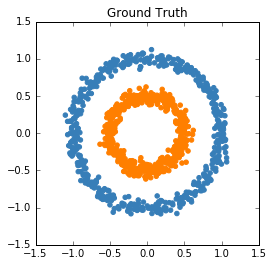

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# create toy datasets for cluster experiments
n_samples = 1000
dataset = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
# dataset = datasets.make_moons(n_samples=n_samples, noise=0.05)
X, y = dataset

def plot_results(X, y, fignum, title):
    # plot with true labels
    fig = plt.figure()
    plt.title(title)
    colors = ['#377eb8', '#ff7f00', '#007f00']
    y_colors = [colors[label] for label in y]
    plt.scatter(X[:,0], X[:,1], color=y_colors)
    plt.gca().set_aspect('equal')
    plt.show()
    
plot_results(X, y, 1, "Ground Truth")

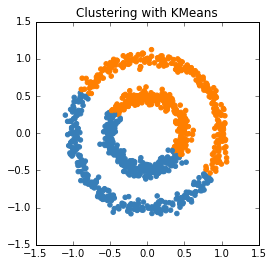

In [2]:
from sklearn.cluster import KMeans

# try clustering with KMeans for comparision
km = KMeans(n_clusters=2)
km.fit(X)
y_pred = km.labels_

# plot results
plt.figure()
plot_results(X, y_pred, 2, "Clustering with KMeans")

## Affinity representation (Laplacian matrix)

In [3]:
from numpy.linalg import norm
from math import exp

num_clusters = 2
sigma_sq = .01

def affinity_kernel(x1, x2):
    # compute the affinity of samples X1, X2 using Gaussian Kernel
    return exp(-(norm(x1-x2)**2)/(2*sigma_sq))

# construct affinity matrix
A = np.zeros((len(X), len(X)))
for i in range(len(X)-1):
    for j in range(i+1, len(X)):
        A[i,j] = affinity_kernel(X[i], X[j])
        A[j,i] = A[i,j]

# print affinity matrix
np.set_printoptions(precision=1)
print(A)

[[  0.0e+00   2.5e-05   1.3e-51 ...,   8.0e-67   3.4e-88   1.7e-17]
 [  2.5e-05   0.0e+00   1.9e-49 ...,   1.3e-85   8.5e-76   7.5e-05]
 [  1.3e-51   1.9e-49   0.0e+00 ...,   7.7e-25   1.1e-08   6.8e-45]
 ..., 
 [  8.0e-67   1.3e-85   7.7e-25 ...,   0.0e+00   1.1e-54   1.1e-98]
 [  3.4e-88   8.5e-76   1.1e-08 ...,   1.1e-54   0.0e+00   6.0e-60]
 [  1.7e-17   7.5e-05   6.8e-45 ...,   1.1e-98   6.0e-60   0.0e+00]]


![](img/gauss.png)

In [4]:
# Construct diagonal degree matrix
D = np.zeros(A.shape)
for i in range(A.shape[0]):
    D[i,i] = np.sum(A[i,:])

print(D)

[[ 14.1   0.    0.  ...,   0.    0.    0. ]
 [  0.   14.2   0.  ...,   0.    0.    0. ]
 [  0.    0.   37.1 ...,   0.    0.    0. ]
 ..., 
 [  0.    0.    0.  ...,  12.6   0.    0. ]
 [  0.    0.    0.  ...,   0.   18.    0. ]
 [  0.    0.    0.  ...,   0.    0.   13.1]]


![](img/sp-g.png)

## Compute the Laplacian
![](img/sp-g2.png)

![](img/lp1.png)

https://en.wikipedia.org/wiki/Laplacian_matrix

![](img/laplacian.png)

This matrix Lsym ‘normalizes’ the Laplacian matrix L in the following sense: the eigenvalues of Lsym vary from 0 to 2, rather than from 0 to n.

The second smallest eigenvalue of L (could be zero) is the algebraic connectivity (or Fiedler value) of G and approximates the sparsest cut of a graph.

In [5]:
# Construct Laplacian Matrix:
#   L = D^{-1/2} A D^{-1/2} --> L[i,j] = -A[i,j]/sqrt(d_i * d_j)

# D^{-1/2}:
Dinvsq = np.sqrt(np.linalg.inv(D))

L = np.dot(Dinvsq, D-A)
L = np.dot(L, Dinvsq)

print(L)

[[  1.0e+000  -1.8e-006  -5.5e-053 ...,  -6.0e-068  -2.1e-089  -1.3e-018]
 [ -1.8e-006   1.0e+000  -8.3e-051 ...,  -9.8e-087  -5.3e-077  -5.5e-006]
 [ -5.5e-053  -8.3e-051   1.0e+000 ...,  -3.6e-026  -4.1e-010  -3.1e-046]
 ..., 
 [ -6.0e-068  -9.8e-087  -3.6e-026 ...,   1.0e+000  -7.0e-056  -8.9e-100]
 [ -2.1e-089  -5.3e-077  -4.1e-010 ...,  -7.0e-056   1.0e+000  -3.9e-061]
 [ -1.3e-018  -5.5e-006  -3.1e-046 ...,  -8.9e-100  -3.9e-061   1.0e+000]]


## Compute eigenvalues and eingenvector of L

In [6]:
# Find the K largest eigenvectors of L
eigvals, eigvects = np.linalg.eigh(L)

best_eigens = [i for i in range(num_clusters)]
print(best_eigens)

LX = np.zeros((L.shape[0], num_clusters))
LX[:,:] = eigvects[:,best_eigens]
# normalize new eigenvector-column-matrix
LX = (LX.T / np.linalg.norm(LX, axis=1)).T
print(LX)

# verify: L v = \lamda v
# print("Eigenvalues:")
# print(eigvals)
#print("Verify an eigenvector + eigenvalue")
#print(np.isclose(np.dot(L,eigvects[:,1]), eigvals[1]*eigvects[:,1]))

[0, 1]
[[ 0.6 -0.8]
 [ 0.6 -0.8]
 [ 0.8  0.6]
 ..., 
 [ 0.6 -0.8]
 [ 0.6 -0.8]
 [ 0.6 -0.8]]


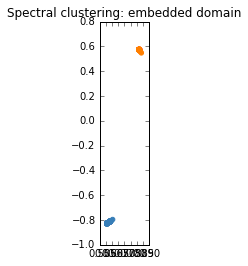

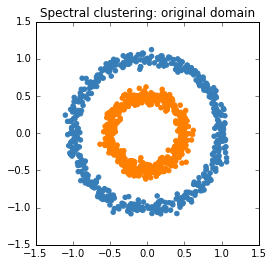

In [7]:

# Finally, do clustering on reduced space using KMeans:
km2 = KMeans(n_clusters=2, n_init=20)
km2.fit(LX)
y_pred = km2.labels_
#y_pred = [1 if x > 0 else 0 for x in LX]

# plot results
plot_results(LX, y_pred, 3, "Spectral clustering: embedded domain")
plot_results(X, y_pred, 3, "Spectral clustering: original domain")

![](img/e1.png)
![](img/e2.png)
![](img/ei3.png)

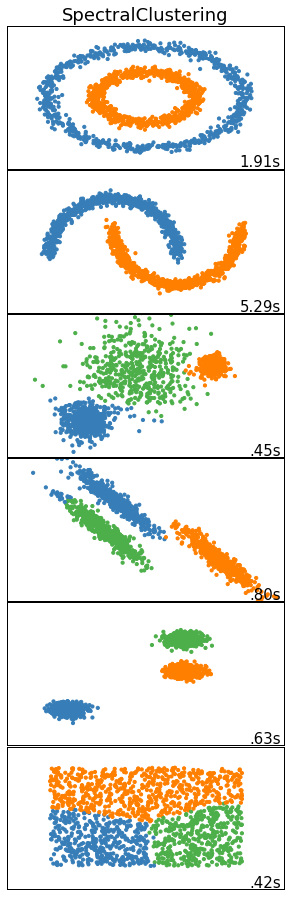

In [8]:
# print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
# plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.figure(figsize=(4, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")

    clustering_algorithms = (('SpectralClustering', spectral),)

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

https://github.com/blubars/Spectral-Clustering/blob/master/jupyter/spectral-clustering-notebook.ipynb